In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def make_hist (image):
    assert len(image.shape) == 2, "grayscale 영상을 입력해주세요. "
    histogram = np.zeros((256), dtype=np.int32)
    h, w = image.shape
    for i in range(h):
        for j in range(w):
            value = image[i, j]
            histogram[value] += 1
    return histogram

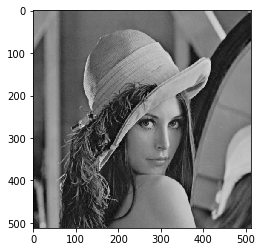

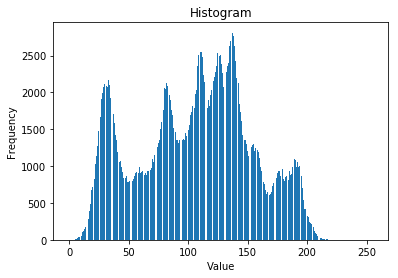

In [8]:
lena = cv2.imread("lena.png", 0)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)
plt.figure()
lena_hist = make_hist(lena)
x = np.arange(256)
plt.bar(x, height=lena_hist)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

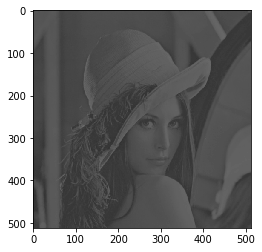

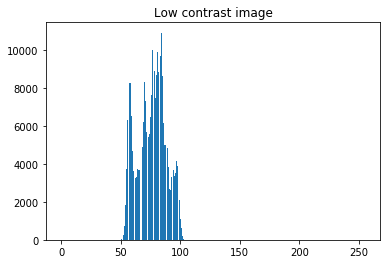

In [9]:
lena_before = cv2.imread("lena_low.png", 0)
h, w = np.shape(lena_before)
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)
plt.figure()
lena_hist = make_hist(lena_before)
x = np.arange(256)
plt.bar(x, height=lena_hist)
plt.title("Low contrast image")
plt.show()

In [10]:
max_value = 0
min_value = 255
for i in np.arange(0,256,1):
    freq = lena_hist[i]
    if freq != 0:
        min_value = i
        break
print("최소 밝기 : ", min_value)
print("최대 밝기 : ", max_value)

최소 밝기 :  50
최대 밝기 :  0


In [11]:
max_value = 0
min_value = 255

sum_low = 0
sum_high = 0
num_pixel = w*h

for i in np.arange(0, 256, 1):
    freq = lena_hist[i]
    sum_low += freq
    if sum_low > num_pixel * 0.05:
        min_value = i
        break
for i in np.arange(255,-1,-1):
    freq = lena_hist[i]
    sum_high += freq
    if sum_high > num_pixel * 0.05:
        max_value = i
        break
print("최소 밝기 : ", min_value)
print("최대 밝기 : ", max_value)

최소 밝기 :  57
최대 밝기 :  96


In [12]:
slope = 255 / (max_value - min_value)
print("slope : ", slope)
print("(max-min)*slope : ", (max_value - min_value)*slope)
lena_after = np.zeros((h,w), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        value = lena_before[i,j]
        if value < min_value:
            lena_after[i, j] = 0
        elif value > max_value:
            lena_after[i, j] = 255
        else:
            lena_after[i, j] = np.uint8(value - min_value) * slope

slope :  6.538461538461538
(max-min)*slope :  255.0


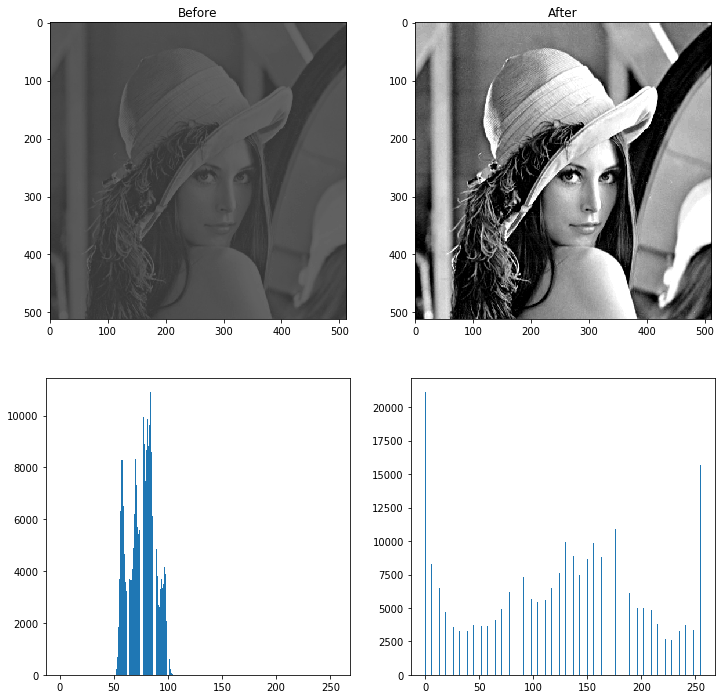

In [13]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x = np.arange(256)
plt.bar(x, height=before_hist)

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256)
plt.bar(x, height=after_hist)

plt.show()

In [23]:
lena_before = cv2.imread("lena_low.png", 0)
h, w = np.shape(lena_before)

lena_after = np.zeros((h,w), dtype=np.uint8)
uint = h*w / 256
print("영상 크기 : ", h, w)
print("uint: ", uint)

lena_hist = make_hist(lena_before)

T=np.zeros((256))
hist_sum = 0
for i in range(256):
    hist_sum += lena_hist[i]
    T[i] = np.uint8(hist_sum / uint)
print("T : ", T)

for i in range(h):
    for j in range(w):
        value = lena_before[i, j]
        lena_after[i, j] = T[value]

영상 크기 :  512 512
uint:  1024.0
T :  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   6.
  12.  20.  28.  35.  39.  43.  46.  49.  53.  56.  60.  64.  69.  75.
  83.  90.  95. 101. 106. 112. 120. 130. 138. 146. 154. 164. 172. 182.
 192. 201. 207. 212. 216. 221. 225. 228. 230. 233. 237. 240. 244. 248.
 252. 254. 255. 255. 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 

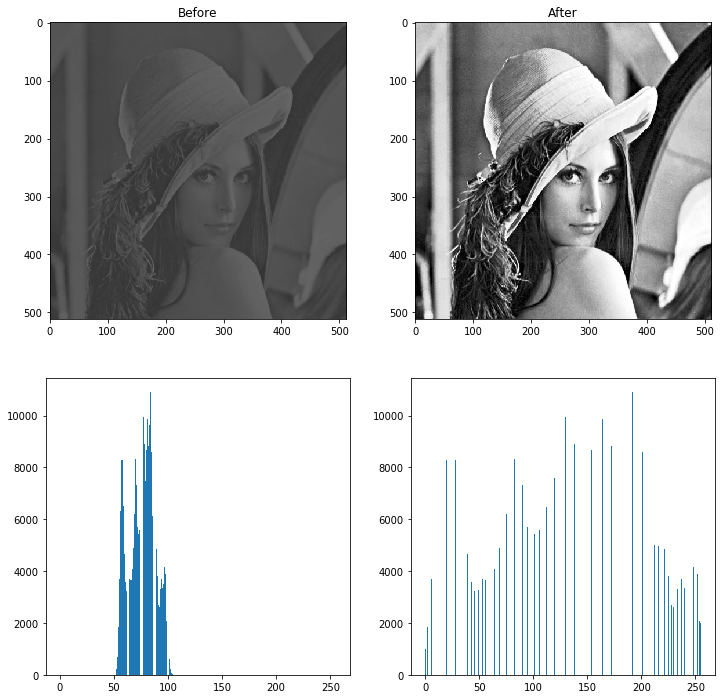

In [24]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap = 'gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x = np.arange(256)
plt.bar(x, height = before_hist)

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256)
plt.bar(x, height = after_hist)

plt.show()

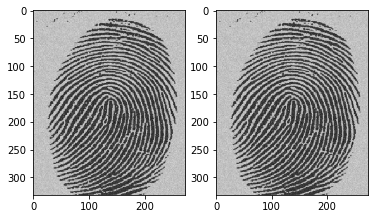

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
finger_image = cv2.imread("finger_print.png", 0)
h,w = np.shape(finger_image)

thresh_image = np.zeros((h,w), dtype = np.uint8)

thresh_value = 120

for i in range(h):
    for j in range(w):
        if finger_image[i, j] >= thresh_value:
            thresh_image[i, j] = 255
        else:
            thresh_image[i, j] = 0

plt.figure()
plt.subplot(1,2,1)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)

Otsu 알고리즘이 찾아낸 임계치 :  127.0


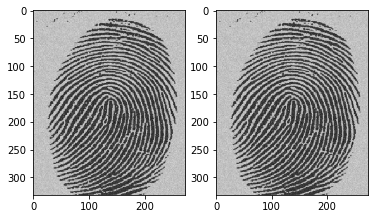

In [31]:
finger_image = cv2.imread("finger_print.png", 0)
th, thresh_image = cv2.threshold(finger_image, 0, 255, cv2.THRESH_OTSU)

print("Otsu 알고리즘이 찾아낸 임계치 : ", th)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)

Otsu 알고리즘이 찾아낸 임계치 :  74.0


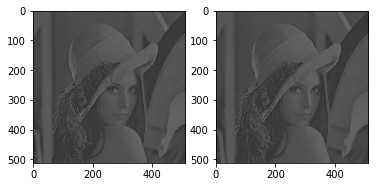

In [33]:
finger_image = cv2.imread("lena_low.png", 0)
th, thresh_image = cv2.threshold(finger_image, 0, 255, cv2.THRESH_OTSU)

print("Otsu 알고리즘이 찾아낸 임계치 : ", th)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)

In [34]:
cv2.imwrite("./threshold_result.png", thresh_image)

True